In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vi genererar slumpmässig datapunkter uniformt på $[0,1]^2$

In [2]:
np.random.seed(133)
N = 20 #number of data points
x = np.random.uniform(0,1, size = (N,2))

Sedan så definerar vi ett plan (eller en linje eftersom vi är i 2d) så om punkterna ligger ovanför så får de label y = 1 0ch ligger de under får de label y= 0

linjens exvation ges av $\vec{n}\cdot \vec{x} = c$ så punkterna får label 1 om 
$$ \vec{n}\cdot \vec{x} > c $$

In [3]:
#n,c are the parameters fo for the hyperplane separating the two sets n*x=c
n = np.array([1,2])
c = 1.2
y = np.zeros((N,)) #labels
for i in range(N):
    if (np.dot(n,x[i,:])>c):
        y[i] = 1

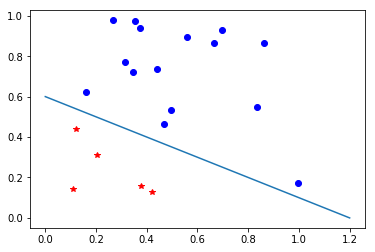

In [4]:
plt.plot(x[y==0,0],x[y==0,1],'r*') #plots all points with albels 0
plt.plot(x[y==1,0],x[y==1,1],'bo') #plots all points with labels 1
plt.plot([0,c/n[0]],[c/n[1],0]) #plots the separating hyperplane

Nu ska vi göre en logistisk regression. Vi har modellen 
$$f_{\omega_0,\omega_1,\omega_2}(x_1,x_2) = P(Y = 1|x,\vec{\omega}) = \frac{1}{1+e^{-(\omega_0 + \omega_1 x_1 + \omega_2 x_2)}} = \frac{e^{(\omega_0 + \omega_1 x_1 + \omega_2 x_2)}}{1+e^{(\omega_0 + \omega_1 x_1 + \omega_2 x_2)}}$$
Och loss funktionen
$$L(f_{\omega_0,\omega_1,\omega_2}(x_1,x_2),y) = -y\log(f_{\omega_0,\omega_1,\omega_2}(x_1,x_2)) - (1-y)\log(1-f_{\omega_0,\omega_1,\omega_2}(x_1,x_2))$$
Så lossen för all våran data är
$$L = -\sum_{i=0}^N y^i\log(f_{\omega_0,\omega_1,\omega_2}(x^i_1,x^i_2)) + (1-y^i)\log(1-f_{\omega_0,\omega_1,\omega_2}(x^i_1,x^i_2))$$
Det är den här lossen vi vill minimera med någon metod. Alltså hitta de optimala parametrarna $\omega_0,\omega_1,\omega_2$

Vår vektor x är en Nx2 vektor, dvs vi har N datapunkter och två features per datapunkt. Vi vill dessutom lägga till en "bias-neuron", dvs vi antar att det faktiskt finns tre indata attribut för varje datapunkt, x_1, x_2 och 1. Det innebär att vi behöver tre vikter, en för varje indata attribut. Därför skapar vi en vektor w med tre element. Dessutom behöver vi några parametrar som bestämmer hur algoritmen beter sig

In [33]:
w = np.zeros((3, ))
epochs = 50
L_list = np.zeros((epochs,))  # save loss development
alfa = 1                      # learning rate

Logistisk funktion och loss funktion som ovan

In [44]:
## all functions take "scalar" indata


# activation function => logistic function
def sigmoid(x, w):
    a = w[0] + w[1]*x[0]  + w[2]*x[1]     # use vector mul. later
    return 1.0/(1.0 + np.exp(-a))
    
def loss(y, f):
    #return -y*np.log(f) - (1-y)*np.log(1 - f)   # since y in {0, 1}, one of the two parts vanishes each time 
    if y == 1:
        return - np.log(f)
    else:
        return - np.log(1-f)
    

Vi behöver dessutom gradienten av loss funktionen med avseende på vikterna, 
$ \frac{\partial L}{\partial w_i} $. För att ta fram det använder vi kedjeregeln: det är lätt att bestämma derivatan av loss funktionen med avseende på $f$,  $\frac{\partial L}{\partial f}$, eftersom $f$ är "direkt" indata till $L$. På samma sätt kan vi enkelt bestämma $\frac{partial f}{\partial a}$ (derivatan av activation function med avseende på pre activation värdet) och derivatan av $a$ med avseende på $w_i$. Totalt får vi
$$ \frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial f} \frac{\partial f}{\partial a} \frac{\partial a}{\partial w_i}$$

In [57]:
def loss_gradient(y, f, x, w):
    a = w[0] + w[1]*x[0]  + w[2]*x[1] # som ovan -> väldigt ineffektiv att ta fram två gånger, bara för tydlighet
    #dL_df = -y/f + (1-y)/(1-f)
    if y == 1:
        dL_df = -1./f
    else:
        dL_df = 1./(1-f)
    
    df_da = np.exp(-a)/(1 + np.exp(-a))**2
    da_dw = np.array([1, x[0], x[1]])
    dL_dw = dL_df*df_da*da_dw
    return dL_dw
    

För logistisk regression går det också att bestämma $\frac{dL}{dw}$ "direkt",
$$\frac{dL}{dw} = \frac{y X}{1 + exp(y w \cdot X)} $$
där X = [1, x]


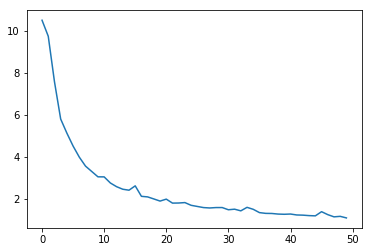

In [68]:
w = np.zeros((3, ))
epochs = 50
L_list = np.zeros((epochs,))  # save loss development
alfa = 1                      # learning rate

# stochastic gradient descent
for i in range(epochs):
    for j in range(N):
        # choose one data point
        ind = np.random.choice(N)
        x_ind = x[ind, :]
        y_ind = y[ind]
    
        f = sigmoid(x_ind, w)
        dL_dw = loss_gradient(y_ind, f, x_ind, w)

        w = w - alfa*dL_dw
    
    # every N iterations: check loss function value
    L_tot = 0
        
    # add upp values for all x_i    
    for j in range(N):
        x_ind = x[j, :]
        y_ind = y[j]
        
        f = sigmoid(x_ind, w)
        L_tot += loss(y_ind, f)
            
    L_list[i] = L_tot
                
plt.plot(L_list)

In [69]:
L_list

array([10.50724175,  9.74503033,  7.57945719,  5.7993421 ,  5.12627282,
        4.51065629,  3.98258928,  3.55487323,  3.29980926,  3.04525349,
        3.04207111,  2.75112689,  2.57526311,  2.45353807,  2.40798625,
        2.61466572,  2.11553455,  2.0884616 ,  1.99023627,  1.88944355,
        1.98194976,  1.79256437,  1.79737339,  1.81744645,  1.68777731,
        1.63302978,  1.57927072,  1.5609157 ,  1.57994202,  1.58092981,
        1.47572269,  1.50273371,  1.42374283,  1.59078688,  1.49680826,
        1.33981571,  1.30371131,  1.29824536,  1.27024634,  1.26013155,
        1.27199616,  1.22741322,  1.21847333,  1.19651601,  1.18512089,
        1.38382054,  1.2430211 ,  1.13785237,  1.16180464,  1.08682357])

## (Statistisk överkurs)
Om man undrar var lossen kommer ifrån så kan man ur ett statistiskt perspektiv se det såhär. Vi modelerar $y|x \sim Ber(f_{\omega_0,\omega_1,\omega_2}(x_1,x_2))$. Då blir Likelihooden för vår data
$$P(y^1,y^2\cdots,y^N|x^1,x^2\cdots x^N) = \prod_{i=1}^NP(y^i|x^i) = \prod_{i=1} (f_{\omega_0,\omega_1,\omega_2}(x_1,x_2))^{y_i}(1-f_{\omega_0,\omega_1,\omega_2}(x_1,x_2))^{1-y_1}$$
För att sannoliketsfunktionen till en $Ber(\theta)$ variabl kan skrivas som $p_Y(y) = \theta^y(1-\theta)^{1-y}$. Att maximera likelihooden är samma sak som att minimera negativ logaritmen av likelihoode. Det är det vi gör ovan. Så att minimera lossen (Som i maskininlärningsvärlden kalla cross-entropy) är helt enkelt att hitta ML-skattningen av $\vec{\omega}$